# Problem 1 (Practice)

Let us solve the differential equation
\begin{align*}
  \frac{dx}{dt}=-x^3 + \sin t
\end{align*}
with the initial condition $x=0$ at $t=0$.

(a) Use Euler's method to solve the system from $t=0$ to $t=10$ in 1000 steps and plot the result. (30 pts)

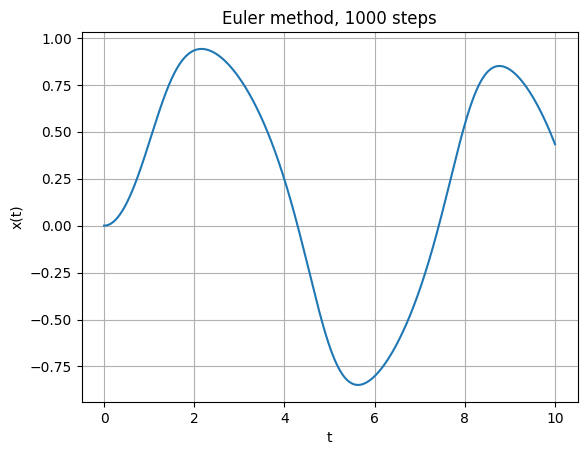

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# By given initial condition, and the iterative step for Euler's method is given as 1000
# So, we define the given variables first
t0 = 0
t1 = 10
x0 = 0
N = 1000

# Define the given differential equation, the variable is x and t
def f(x,t):
    return -x**3 + np.sin(t)

# Euler's method
# Since we know x_0 and f_0 (f(x_0, t_0)), we can compute the x(del_t) using Euler's method.
# Repeating this process, we can compute x(t) for t in [t0, t1] using x(n*del_t + del_t) = x(n*del_t) + del_t*f(n*del_t, x(n*del_t))
def euler(f, t0, t1, x0, n):
    del_t = (t1-t0)/n
    t = np.linspace(t0, t1, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(n):
        x[i+1] = x[i] + del_t*f(x[i], t[i])
    return x, t

x_e, t_e = euler(f, t0, t1, x0, N)

plt.figure()
plt.plot(t_e, x_e)
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(f"Euler method, {N} steps")
plt.grid(True)
plt.show()


(b) Use the second-order Runge-Kutta method to solve the system. Try the algorithm for 10, 20, 50, 100 timesteps and plot the result in a single figure. (30 pts)

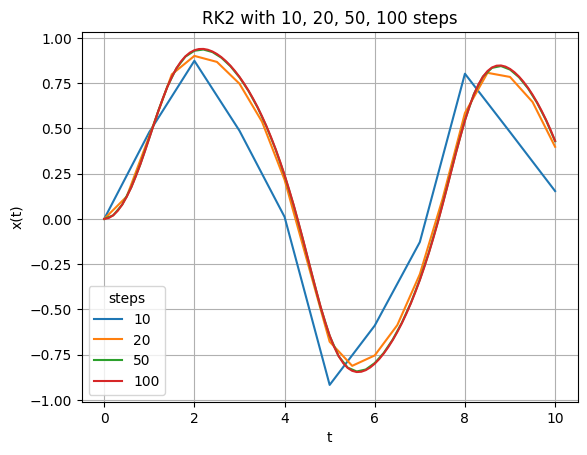

In [45]:
# Timesteps are given in the problem statement
N = [10, 20, 50, 100]

# 2nd order Runge-Kutta method
# the equation of k_1, k_2 are given in the lecture note 4 in page 16
# the equation of x(t + del_t) is given in the lecture note 4 in page 14
def rk2(f, t0, t1, x0, n):
    del_t = (t1-t0)/n
    t = np.linspace(t0, t1, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(n):
        k1 = del_t * f(x[i], t[i])
        k2 = del_t * f(x[i] + k1/2, t[i] + del_t/2)
        x[i+1] = x[i] + k2
    return x, t

# plot in a single figure
plt.figure()
for n in N:
    x, t = rk2(f, t0, t1, x0, n)
    plt.plot(t, x, label=str(n))
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("RK2 with 10, 20, 50, 100 steps")
plt.legend(title="steps")
plt.grid(True)
plt.show()

(c) Use the fourth-order Runge-Kutta method to solve the system for 10, 20, 50, 100 timesteps and plot the result in a single figure. (40 pts)

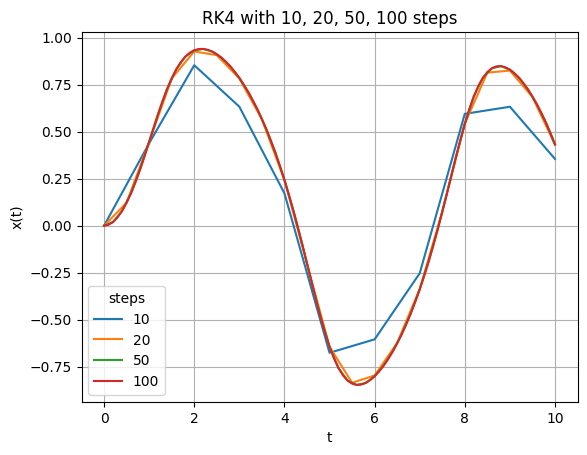

In [46]:
# 4th order Runge-Kutta method
# the equation of k_1, k_2, k_3, k_4 and fourth-order RK are given in the lecture note 4 in page 16
def rk4(f, t0, t1, x0, n):
    del_t = (t1-t0)/n
    t = np.linspace(t0, t1, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    for i in range(n):
        k1 = del_t*f(x[i], t[i])
        k2 = del_t*f(x[i] + k1/2, t[i] + del_t/2)
        k3 = del_t*f(x[i] + k2/2, t[i] + del_t/2)
        k4 = del_t*f(x[i] + k3, t[i] + del_t)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return x, t

# plot in a single figure
plt.figure()
for n in N:
    x, t = rk4(f, t0, t1, x0, n)
    plt.plot(t, x, label=str(n))
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("RK4 with 10, 20, 50, 100 steps")
plt.legend(title="steps")
plt.grid(True)
plt.show()

---
# Problem 2

The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables x and y be proportional to the size of the
populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x$ = 2 means there are 2000 rabbits. Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes. But 0.001 is a pretty close spacing of values, so it's a decent approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their
population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:
\begin{align*}
  \frac{dx}{dt}=\alpha x - \beta xy,
\end{align*}
where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional
to the rate at which they eat rabbits-because they need food to grow and reproduce but also die of old age at a rate proportional to their own population:
\begin{align*}
  \frac{dy}{dt}=\gamma xy - \delta y,
\end{align*}
where $\gamma$ and $\delta$ are also constants.

(a) Write a program to solve these equations using the fourth-order Runge-Kutta method for the case $\alpha$ = 1, $\beta$ = $\gamma$ = 0.5, and $\delta$ = 2, starting from the initial
condition $x = y = 2$. Have the program make a graph showing both $x$ and
$y$ as a function of time on the same axes from $t = 0$ to $t = 30$. (25 pts)

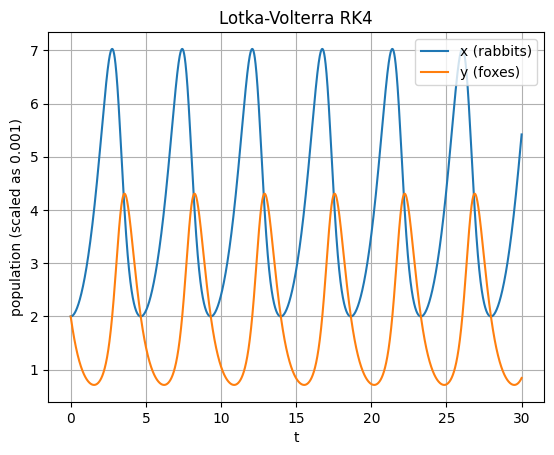

In [ ]:
# The model setup
#   x(t): population of prey
#   y(t): population of predators

# The constants are fixed. this is the parameteres for solving DE
ALPHA = 1
BETA = 0.5
GAMMA = 0.5
DELTA = 2

# Consider the given two DE as a system of functions
# So, use the np.array for representing it
def f1(x, Y):
    x, y = Y
    return np.array([ALPHA*x - BETA*x*y, GAMMA*x*y - DELTA*y])

# We will consider the solving DE program of two DE with system of functions
# So, redefine the rk4 system for the system of functions
# The method of computing k1~k4 is same as the previous rk4 method
def rk4_system(f, t0, t1, y0, n):
    del_h = (t1-t0)/n
    t = np.linspace(t0, t1, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    for i in range(n):
        k1 = np.array(del_h * f(t[i], y[i]))
        k2 = np.array(del_h * f(t[i] + del_h/2, y[i] + k1/2))
        k3 = np.array(del_h * f(t[i] + del_h/2, y[i] + k2/2))
        k4 = np.array(del_h * f(t[i] + del_h, y[i] + k3))
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return t, y

# Initial conditions are x(0) = 2, y(0) = 2
# Solve the DE from t=0 to t=30 with 3000 steps
# the output is graph of approaximated x(t) and y(t)
t, Y = rk4_system(f1, 0, 30, np.array([2, 2]), 3000)
x, y = Y[:,0], Y[:,1]

# plot in a single figure
plt.figure()
plt.plot(t, x, label="x (rabbits)")
plt.plot(t, y, label="y (foxes)")
plt.xlabel("t")
plt.ylabel("population (scaled as 0.001)")
plt.title("Lotka-Volterra RK4")
plt.legend()
plt.grid(True)
plt.show()

(b) Describe in words what is going on in the system, in terms of rabbits and foxes. Change the coefficient $\alpha=-0.1$. Describe in words what this means. What happens eventually? (25 pts)

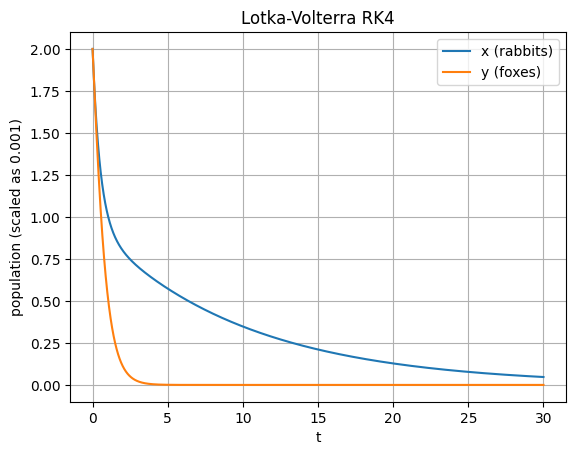

In [ ]:
# With parameter setting with (a), the equation and plot show stable closed orbits. Rabbits grow first and then foxes grow. Which means the overhunt rabbits. Consequently, population of rabbits decrease and then foxes are also decreased.
# In the part (b), the alpha is -0.1, which means the rabbits decrease inself intrinsically. So, the population of rabbits is monotonically decreaed. The population of foxes also decreased and faster than decay of rabbits since the term of 
# \gamma xy - \delta y, becomes negative once x is small and the effect of parameter delta that make the populatoin of foxes decay fast.

ALPHA2 = -0.1
def f2(t, Y):
    x, y = Y
    return np.array([ALPHA2*x - BETA*x*y, GAMMA*x*y - DELTA*y])

# Initial conditions are x(0) = 2, y(0) = 2
# Solve the DE from t=0 to t=30 with 3000 steps
# the output is graph of approaximated x(t) and y(t)
t2, Y2 = rk4_system(f2, 0, 30, np.array([2, 2]), 3000)
x2, y2 = Y2[:,0], Y2[:,1]

# plot in a single figure
plt.figure()
plt.plot(t2, x2, label="x (rabbits)")
plt.plot(t2, y2, label="y (foxes)")
plt.xlabel("t")
plt.ylabel("population (scaled as 0.001)")
plt.title("Lotka-Volterra RK4")
plt.legend()
plt.grid(True)
plt.show()

---
# Problem 3

One of the most celebrated sets of differential equations in physics is the Lorenz equations:
\begin{align*}
  \frac{dx}{dt} &= \sigma(y-x),\\
  \frac{dy}{dt} &= rx - y - xz, \\
  \frac{dz}{dt} &= xy - ba,
\end{align*}
where $\sigma$, $r$, and $b$ are constants.

These equations were first studied by Edward Lorenz in 1963, who derived them
from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of deterministic chaos, the occurrence of apparently random motion even though there is no randomness built into the equations.

(a) Write a program to solve the Lorenz equations for the case $\sigma = 10$, $r = 28$,
and $b = 8/3$ in the range from $t = 0$ to $t = 50$ with initial conditions $(x,y,z) =
(0, 1,0)$. Have your program make a plot of $y$ as a function of time. Change the initial condition to $(0,1.001,0)$ and plot the result. Note the unpredictable nature of the motion. Be careful to rename your coefficients as not to overlap with previous definitions. (25 pts)

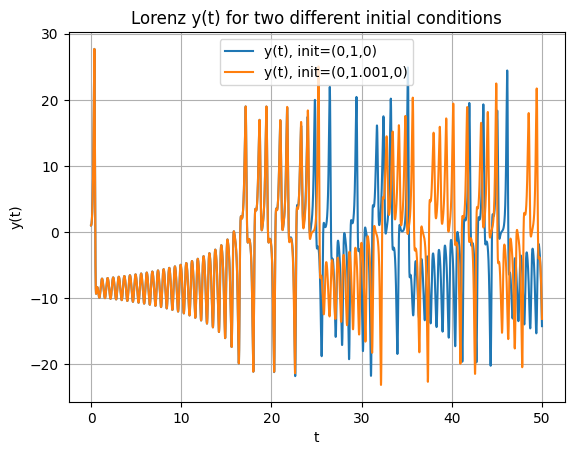

In [ ]:
# Define the constants
sigma, r, b = 10, 28, 8/3

# there are three variables x, y, z
# Consider the given two DE as a system of functions
# So, use the np.array for representing it
def lorenz(t, Y):
    x, y, z = Y
    return np.array([sigma*(y-x), r*x - y - x*z, x*y - b*z])

# the initial conditions are (0, 1, 0) and (0, 1.001, 0)
t, Y1 = rk4_system(lorenz, 0, 50, np.array([0, 1, 0]), 20000)
_, Y2 = rk4_system(lorenz, 0, 50, np.array([0, 1.001, 0]), 20000)

# plot in a single figure
plt.figure()
plt.plot(t, Y1[:,1], label="y(t), init=(0,1,0)")
plt.plot(t, Y2[:,1], label="y(t), init=(0,1.001,0)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Lorenz y(t) for two different initial conditions")
plt.grid(True)
plt.show()


(b) Modify your program to produce a plot of $z$ against $x$. You should see a picture
of the famous "strange attractor" of the Lorenz equations, a lop-sided butterflyshaped
plot that never repeats itself. Plot for two slightly different initial conditions. (25 pts)

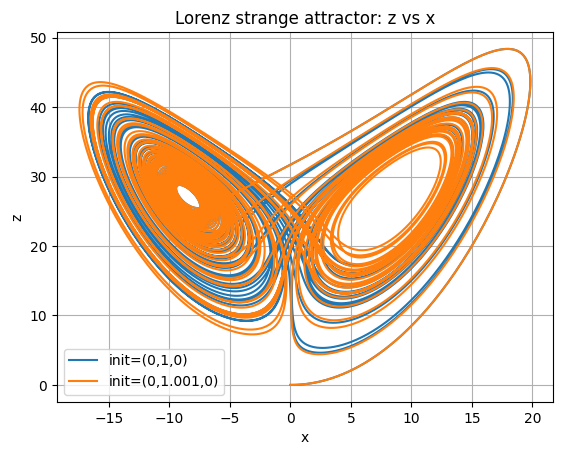

In [ ]:
# plot the Lorenz strange attractor
# plot in a single figure
plt.figure()
plt.plot(Y1[:,0], Y1[:,2], label="init=(0,1,0)")
plt.plot(Y2[:,0], Y2[:,2], label="init=(0,1.001,0)")
plt.xlabel("x")
plt.ylabel("z")
plt.title("Lorenz strange attractor: z vs x")
plt.legend()
plt.grid(True)
plt.show()